# Sphractal Demonstration on Different Atomistic Objects

This is an application demonstration of using `Sphractal` to estimate the fractal dimension of the surfaces of different 3D atomistic objects. If you haven't already, check out the [basic demonstration notebook](basicDemo.ipynb) to understand the basic prerequisites and usage of `Sphractal` functionalities.

The directory and file paths in this notebook are set up for the notebook to be run from `sphractal/docs/`. If this is not the case, the path needs to be changed accordingly for the cells to be executed properly. The coordinates in this notebook are visualised using [The Open Visualization Tool (OVITO)](https://www.ovito.org/about/).

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from sphractal import runBoxCnt
from sphractal.datasets import getMiscellaneousDataPaths

fastbcPath = '../src/fastbc/3DbinImBCcpu'

## General settings

We leave most of the optional arguments as default values. The non-default parameter values used here are:
- `findSurfAlg`, which is set to *'numNeigh'* for easier specification of surface atoms (which are all atoms in these test cases -- there are no inner/bulk atoms whose surface we want to ignore). The *'alphaShape'* option might also result in runtime errors during the finding of surface atoms.
- `rmInSurf`, which is set to *False* as there are no inner surfaces apart from overlapping spherical surfaces of the surface atoms. Setting to *True* might result in incorrect removal of surface points or runtime errors as it depends on the identification of the bulk/inner atoms, which is nonexistent in these test cases.
- `numPoints`, which is set to a lower value (*300* instead of *10000*) to increase the visibility of the inner parts of the output file generated for visualisation.
- `figType`, which is set to *'notebook'* for better display of figures.
- `showPlot`, which is set to *True* to turn on the display of figures.
- `verbose`, which is set to *True* to increase the verbosity.

## Load Atomic Coordinates

We use a **paracetamol molecule**, a **double helix strand of deoxyribonucleic acid (DNA)**, and a **graphene sheet** here as our test cases. 
Below are snapshots of the objects:

![Paracetamol](figs/paracetamol.png)

![Double helix DNA](figs/dna.png)

![Graphene sheet](figs/graphene.png)

In [10]:
inpFiles = getMiscellaneousDataPaths()
for inpFile in inpFiles:
    print(inpFile)

/mnt/c/Users/ASUS/Documents/PhD/Workstation/PaperDrafts/NP_Frac_Dim/JComputatSci/sphractal-methodology-publication/sphractal/src/sphractal/data/dna.xyz
/mnt/c/Users/ASUS/Documents/PhD/Workstation/PaperDrafts/NP_Frac_Dim/JComputatSci/sphractal-methodology-publication/sphractal/src/sphractal/data/graphene.xyz
/mnt/c/Users/ASUS/Documents/PhD/Workstation/PaperDrafts/NP_Frac_Dim/JComputatSci/sphractal-methodology-publication/sphractal/src/sphractal/data/paracetamol.xyz


## Paracetamol Molecule


paracetamol
  Approximating the surface with 300 points for each atom...
    Assessing points over:
      20 atoms using 8 cpu(s)...
      300 points using 1 cpu(s)...
    5767 surface points -> 5767 voxels, # grids: 1024
  D_Box: 1.7822 [1.6378, 1.9266],  R2: 0.9966,  boxLens: (-2.7093, -1.2041)

  Representing the surface by treating each atom as exact spheres...
    Scanning over:
      10 box lengths using 1 cpu(s)...
      20 atoms using 8 cpu(s)...
    (1/eps)    (# bulk)    (# surf)
      2.04           7         452
      2.40          20         681
      2.82          57         953
      3.29         141        1285
      3.82         276        1745
      4.50         568        2437
      5.23        1071        3316
      6.12        1948        4621
      7.11        3429        6301
      8.31        6046        8526
  D_Box: 2.0444 [2.0129, 2.0758],  R2: 0.9999,  boxLens: (0.4506, 0.7864)



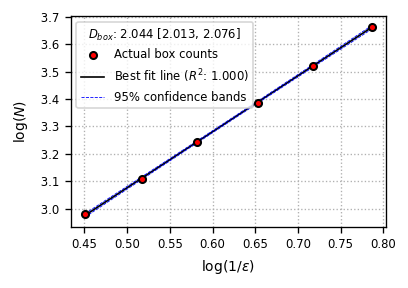

In [7]:
paracetamolBoxCntResults = runBoxCnt(inpFiles[2], findSurfAlg='numNeigh', rmInSurf=False, 
                                     fastbcPath=fastbcPath, numPoints=300, 
                                     figType='notebook', verbose=True)

### Voxelised Point Cloud Representation

The point cloud representation of the surface looks like:

![Paracetamol Surface Point Cloud](figs/paracetamolVXpointCloud.png)

While the voxelised representation looks like:

![Paracetamol Surface Voxels](figs/paracetamolVXvoxels.png)

### Mathematically Exact Surface Representation

The mathematically exact representation of the surface and their cross sections looks like:

$\epsilon = 0.49, N(\epsilon) = 452$

![Paracetamol Exact Surface Box Count 1](figs/paracetamolEX1.png)

![Paracetamol Exact Surface Box Count 1](figs/paracetamolEX1sliced.png)

$\epsilon = 0.12, N(\epsilon) = 8526$

![Paracetamol Exact Surface Box Count 10](figs/paracetamolEX10.png)

![Paracetamol Exact Surface Box Count 10](figs/paracetamolEX10sliced.png)

## DNA Double Helix


dna
  Approximating the surface with 300 points for each atom...
    Assessing points over:
      768 atoms using 8 cpu(s)...
      300 points using 1 cpu(s)...
    223500 surface points -> 223401 voxels, # grids: 1024
  D_Box: 2.0792 [1.9088, 2.2495],  R2: 0.9949,  boxLens: (-2.7093, -0.9031)

  Representing the surface by treating each atom as exact spheres...
    Scanning over:
      10 box lengths using 1 cpu(s)...
      768 atoms using 8 cpu(s)...
    (1/eps)    (# bulk)    (# surf)
      2.08         431       19150
      2.42        1128       26590
      2.83        2743       36772
      3.31        6042       50658
      3.86       12318       70291
      4.50       23979       96318
      5.23       44311      131477
      6.12       80638      180323
      7.13      142261      245824
      8.32      247732      336183
  D_Box: 2.0880 [2.0733, 2.1028],  R2: 1.0000,  boxLens: (0.3171, 0.6532)



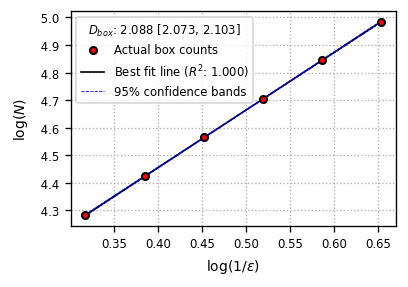

In [11]:
dnaBoxCntResults = runBoxCnt(inpFiles[0], findSurfAlg='numNeigh', rmInSurf=False, 
                             fastbcPath=fastbcPath, numPoints=300, 
                             figType='notebook', verbose=True)

### Voxelised Point Cloud Surface Representation

The point cloud representation of the surface looks like:

![Double Helix DNA Surface Point Cloud](figs/dnaVXpointCloud.png)

While the voxelised representation looks like:

![Double Helix DNA Surface Voxels](figs/dnaVXvoxels.png)

### Mathematically Exact Surface Representation

The mathematically exact representation of the surface and their cross sections looks like:

$\epsilon = 0.48, N(\epsilon) = 19150$

![Double Helix DNA Exact Surface Box Count 1](figs/dnaEX1.png)

![Double Helix DNA Exact Surface Box Count 1](figs/dnaEX1sliced.png)

$\epsilon = 0.12, N(\epsilon) = 336183$

![Double Helix DNA Exact Surface Box Count 10](figs/dnaEX10.png)

![Double Helix DNA Exact Surface Box Count 10](figs/dnaEX10sliced.png)

## Graphene Sheet


graphene
  Approximating the surface with 300 points for each atom...
    Assessing points over:
      306 atoms using 8 cpu(s)...
      300 points using 1 cpu(s)...
    87543 surface points -> 87530 voxels, # grids: 1024
  D_Box: 1.9707 [1.8351, 2.1063],  R2: 0.9975,  boxLens: (-2.7093, -1.2041)

  Representing the surface by treating each atom as exact spheres...
    Scanning over:
      10 box lengths using 1 cpu(s)...
      306 atoms using 8 cpu(s)...
    (1/eps)    (# bulk)    (# surf)
      1.88          22        7460
      2.19         282        9300
      2.57         764       13158
      2.97        1760       18321
      3.48        3790       25307
      4.07        7674       35302
      4.75       14876       47707
      5.54       27162       66358
      6.45       48534       90010
      7.55       84622      124151
  D_Box: 2.0540 [1.9562, 2.1518],  R2: 0.9983,  boxLens: (0.2742, 0.6769)



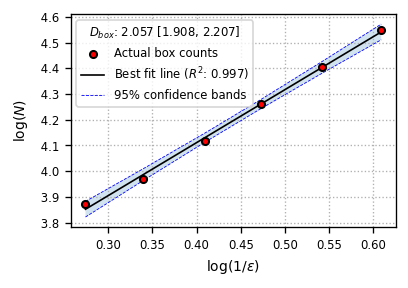

In [12]:
grapheneBoxCntResults = runBoxCnt(inpFiles[1], findSurfAlg='numNeigh', rmInSurf=False, 
                                  fastbcPath=fastbcPath, numPoints=300, 
                                  figType='notebook', verbose=True)

### Voxelised Point Cloud Surface Representation

The point cloud representation of the surface looks like:

![Graphene Sheet Surface Point Cloud](figs/grapheneVXpointCloud.png)

While the voxelised representation looks like:

![Graphene Sheet Surface Voxels](figs/grapheneVXvoxels.png)

### Mathematically Exact Surface Representation

The mathematically exact representation of the surface and their cross sections looks like:

$\epsilon = 0.53, N(\epsilon) = 7460$

![Graphene Sheet Exact Surface Box Count 1](figs/grapheneEX1.png)

![Graphene Sheet Exact Surface Box Count 1](figs/grapheneEX1sliced.png)

$\epsilon = 0.13, N(\epsilon) = 124151$

![Graphene Sheet Exact Surface Box Count 10](figs/grapheneEX10.png)

![Graphene Sheet Exact Surface Box Count 10](figs/grapheneEX10sliced.png)